## Laka Shrinath Yadav
## EP21BTECH11018

In [32]:

import numpy as np
from scipy.stats import norm, chi2
from matplotlib import pyplot as plt
from astroML.resample import bootstrap
from astroML.stats import sigmaG
from scipy.optimize import curve_fit


## Q1

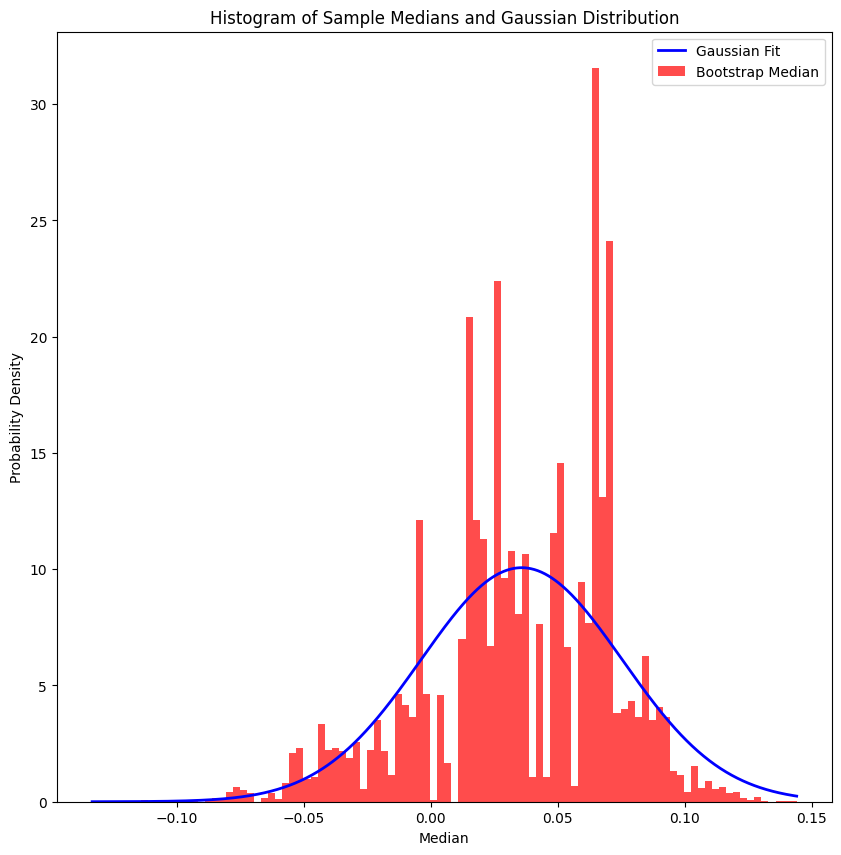

In [14]:

mean = 0.0
std = 1.0
samples = 1000
data = np.random.normal(mean, std, samples)
n_bootstrap = 10000
medians = bootstrap(data, n_bootstrap, np.median, kwargs=dict(axis=1))
meanmed = np.mean(medians)
sigmedian = np.sqrt(np.pi/(2*samples))


fig, ax = plt.subplots(figsize=(10, 10))
hist = ax.hist(medians, bins=100, density=True, alpha=0.7, color='red')
x = np.linspace(np.min(medians), np.max(medians), 1000)
gauss = norm(meanmed, sigmedian).pdf(x)
ax.plot(x, gauss, '-', color='blue', lw=2, label="Gaussian fit")
ax.set_xlabel('Median')
ax.set_ylabel('Probability Density')
plt.title('Histogram of Sample Medians and Gaussian Distribution')
plt.legend(['Gaussian Fit', 'Bootstrap Median'])
plt.show()


## Q2

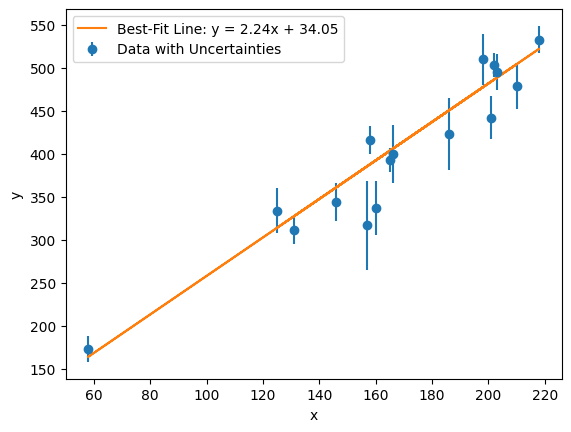

Best-Fit Slope (m): 2.24 ± 0.12
Best-Fit Intercept (b): 34.05 ± 21.08


In [31]:
#linear eqn
def linear_model(x, m, b):
    return m * x + b

x = np.array([203, 58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186, 125, 218, 146])
y = np.array([495, 173, 479, 504, 510, 416, 393, 442, 317, 311, 400, 337, 423, 334, 533, 344])
sig_y = np.array([21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34, 31, 42, 26, 16, 22])

# Perform chi2 minimization
params, covariance = curve_fit(linear_model, x, y, sigma=sig_y)
best_fit_m, best_fit_b = params
sigma_m, sigma_b = np.sqrt(np.diag(covariance))
best_fit_line = linear_model(x, best_fit_m, best_fit_b)


plt.errorbar(x, y, yerr=sig_y, fmt='o', label='Data with Uncertainties')
plt.plot(x, best_fit_line, label=f'Best-Fit Line: y = {best_fit_m:.2f}x + {best_fit_b:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print(f"Best-Fit Slope (m): {best_fit_m:.2f} ± {sigma_m:.2f}")
print(f"Best-Fit Intercept (b): {best_fit_b:.2f} ± {sigma_b:.2f}")

## q3

In [36]:
chi2_values = np.array([47.04, 11.76, 188.16, 139.65])

dof = 49
p_value = 1 - chi2.cdf(chi2_values, dof)
print("P-values are ",p_value,"for", chi2_values)   


P-values are  [5.52926434e-01 9.99999992e-01 0.00000000e+00 1.21072929e-10] for [ 47.04  11.76 188.16 139.65]
